## Association rule on movies_data

In [1]:
#import libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
#Load datasets
movies = pd.read_csv('my_movies.csv')

In [3]:
movies.head()

V1       V2             V3          V4     V5  Sixth Sense  \
0  Sixth Sense    LOTR1  Harry Potter1  Green Mile  LOTR2            1   
1    Gladiator  Patriot     Braveheart         NaN    NaN            0   
2        LOTR1    LOTR2            NaN         NaN    NaN            0   
3    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   
4    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   

   Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  Harry Potter2  LOTR  \
0          0      1              1        0      1              0     0   
1          1      0              0        1      0              0     0   
2          0      1              0        0      1              0     0   
3          1      0              0        1      0              0     0   
4          1      0              0        1      0              0     0   

   Braveheart  Green Mile  
0           0           1  
1           1           0  
2           0           0  
3           0           0  
4           0           0

### Apriori Algorithm

In [4]:
#Apriori algorithm for min_support = 0.1 and confidence

In [5]:
df=pd.get_dummies(movies)

In [6]:
df.head()

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  ...  V2_LOTR  V2_LOTR1  \
0              0     0           0           1  ...        0         1   
1              0     0           1           0  ...        0         0   
2              0     0           0           0  ...        0         0   
3              0     0           0           0  ...        0         0   
4              0     0           0           0  ...        0         0   

   V2_LOTR2  V2_Patriot  V3_Braveheart  V3_Gladiator  V3_Harry Potter1  \
0         0           0              0             0                 1   
1         0           1              1             0                 0   
2         1           0              0             0                 0   
3         0           1              0             0                 0   
4         0           1              0             0                 0   

   V3_Sixth Sense  V4_Green Mile  V5_LOTR2  
0               0              1         1  
1               0              0         0  
2               0              0         0  
3               1              0         0  
4               1              0         0  

[5 rows x 25 columns]

In [7]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
0         0.6                                      (Sixth Sense)
1         0.7                                        (Gladiator)
2         0.2                                            (LOTR1)
3         0.2                                    (Harry Potter1)
4         0.6                                          (Patriot)
...       ...                                                ...
1392      0.1  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...
1393      0.1  (LOTR1, V1_Sixth Sense, V2_LOTR1, LOTR2, V5_LO...
1394      0.1  (Harry Potter1, V1_Sixth Sense, V2_LOTR1, LOTR...
1395      0.1  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...
1396      0.1  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...

[1397 rows x 2 columns]

In [8]:
frequent_itemsets = apriori(df, min_support = 0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets  length
0         0.6                                      (Sixth Sense)       1
1         0.7                                        (Gladiator)       1
2         0.2                                            (LOTR1)       1
3         0.2                                    (Harry Potter1)       1
4         0.6                                          (Patriot)       1
...       ...                                                ...     ...
1392      0.1  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...       9
1393      0.1  (LOTR1, V1_Sixth Sense, V2_LOTR1, LOTR2, V5_LO...       9
1394      0.1  (Harry Potter1, V1_Sixth Sense, V2_LOTR1, LOTR...       9
1395      0.1  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...       9
1396      0.1  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...      10

[1397 rows x 3 columns]

In [9]:
#Rules when min_support = 0.1 and min_threshold for lift is 0.7

In [10]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold= 0.5)
rules

antecedents                                        consequents  \
0           (Sixth Sense)                                        (Gladiator)   
1             (Gladiator)                                      (Sixth Sense)   
2                 (LOTR1)                                      (Sixth Sense)   
3           (Sixth Sense)                                            (LOTR1)   
4         (Harry Potter1)                                      (Sixth Sense)   
...                   ...                                                ...   
64247          (V5_LOTR2)  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...   
64248        (Green Mile)  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...   
64249  (V3_Harry Potter1)  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...   
64250     (V4_Green Mile)  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...   
64251       (Sixth Sense)  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...   

       antecedent support  consequent support  support  confidence       lift  \
0                     0.6                 0.7      0.5    0.833333   1.190476   
1                     0.7                 0.6      0.5    0.714286   1.190476   
2                     0.2                 0.6      0.1    0.500000   0.833333   
3                     0.6                 0.2      0.1    0.166667   0.833333   
4                     0.2                 0.6      0.1    0.500000   0.833333   
...                   ...                 ...      ...         ...        ...   
64247                 0.1                 0.1      0.1    1.000000  10.000000   
64248                 0.2                 0.1      0.1    0.500000   5.000000   
64249                 0.1                 0.1      0.1    1.000000  10.000000   
64250                 0.2                 0.1      0.1    0.500000   5.000000   
64251                 0.6                 0.1      0.1    0.166667   1.666667   

       leverage  conviction  
0          0.08        1.80  
1          0.08        1.40  
2         -0.02        0.80  
3         -0.02        0.96  
4         -0.02        0.80  
...         ...         ...  
64247      0.09         inf  
64248      0.08        1.80  
64249      0.09         inf  
64250      0.08        1.80  
64251      0.04        1.08  

[64252 rows x 9 columns]

In [11]:
rules.sort_values('lift',ascending = False)

antecedents  \
32126    (V3_Harry Potter1, LOTR1, V5_LOTR2, Green Mile)   
40479            (V1_Sixth Sense, Sixth Sense, V5_LOTR2)   
40451  (V4_Green Mile, V1_Sixth Sense, Sixth Sense, V...   
40452  (V3_Harry Potter1, V1_Sixth Sense, V4_Green Mi...   
40453  (V3_Harry Potter1, V1_Sixth Sense, Sixth Sense...   
...                                                  ...   
40                                           (Gladiator)   
1653            (V4_Green Mile, Sixth Sense, Green Mile)   
6291   (V1_Sixth Sense, Sixth Sense, V4_Green Mile, G...   
1664                                         (Gladiator)   
686                                          (Gladiator)   

                                             consequents  antecedent support  \
32126                (Harry Potter1, LOTR2, Sixth Sense)                 0.1   
40479  (V3_Harry Potter1, V4_Green Mile, Harry Potter...                 0.1   
40451      (V3_Harry Potter1, Harry Potter1, Green Mile)                 0.1   
40452             (Harry Potter1, Sixth Sense, V5_LOTR2)                 0.1   
40453           (V4_Green Mile, Harry Potter1, V5_LOTR2)                 0.1   
...                                                  ...                 ...   
40                                          (Green Mile)                 0.7   
1653                                         (Gladiator)                 0.2   
6291                                         (Gladiator)                 0.2   
1664            (V4_Green Mile, Sixth Sense, Green Mile)                 0.7   
686                          (V4_Green Mile, Green Mile)                 0.7   

       consequent support  support  confidence       lift  leverage  \
32126                 0.1      0.1    1.000000  10.000000      0.09   
40479                 0.1      0.1    1.000000  10.000000      0.09   
40451                 0.1      0.1    1.000000  10.000000      0.09   
40452                 0.1      0.1    1.000000  10.000000      0.09   
40453                 0.1      0.1    1.000000  10.000000      0.09   
...                   ...      ...         ...        ...       ...   
40                    0.2      0.1    0.142857   0.714286     -0.04   
1653                  0.7      0.1    0.500000   0.714286     -0.04   
6291                  0.7      0.1    0.500000   0.714286     -0.04   
1664                  0.2      0.1    0.142857   0.714286     -0.04   
686                   0.2      0.1    0.142857   0.714286     -0.04   

       conviction  
32126         inf  
40479         inf  
40451         inf  
40452         inf  
40453         inf  
...           ...  
40       0.933333  
1653     0.600000  
6291     0.600000  
1664     0.933333  
686      0.933333  

[64252 rows x 9 columns]

In [12]:
import matplotlib.pyplot as plt

In [41]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [42]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

In [14]:
#Rules when min_support = 0.1 and min_threshold for confidence is 0.7

In [15]:
rules1 = association_rules(frequent_itemsets, metric='confidence', min_threshold = 0.5)
rules1

antecedents                                        consequents  \
0           (Sixth Sense)                                        (Gladiator)   
1             (Gladiator)                                      (Sixth Sense)   
2                 (LOTR1)                                      (Sixth Sense)   
3         (Harry Potter1)                                      (Sixth Sense)   
4           (Sixth Sense)                                          (Patriot)   
...                   ...                                                ...   
63233             (LOTR2)  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...   
63234          (V5_LOTR2)  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...   
63235        (Green Mile)  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...   
63236  (V3_Harry Potter1)  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...   
63237     (V4_Green Mile)  (LOTR1, Harry Potter1, V1_Sixth Sense, V2_LOTR...   

       antecedent support  consequent support  support  confidence       lift  \
0                     0.6                 0.7      0.5    0.833333   1.190476   
1                     0.7                 0.6      0.5    0.714286   1.190476   
2                     0.2                 0.6      0.1    0.500000   0.833333   
3                     0.2                 0.6      0.1    0.500000   0.833333   
4                     0.6                 0.6      0.4    0.666667   1.111111   
...                   ...                 ...      ...         ...        ...   
63233                 0.2                 0.1      0.1    0.500000   5.000000   
63234                 0.1                 0.1      0.1    1.000000  10.000000   
63235                 0.2                 0.1      0.1    0.500000   5.000000   
63236                 0.1                 0.1      0.1    1.000000  10.000000   
63237                 0.2                 0.1      0.1    0.500000   5.000000   

       leverage  conviction  
0          0.08         1.8  
1          0.08         1.4  
2         -0.02         0.8  
3         -0.02         0.8  
4          0.04         1.2  
...         ...         ...  
63233      0.08         1.8  
63234      0.09         inf  
63235      0.08         1.8  
63236      0.09         inf  
63237      0.08         1.8  

[63238 rows x 9 columns]

In [43]:
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [44]:
plt.scatter(rules1['support'], rules1['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

In [17]:
rules1 = rules1.sort_values(['confidence','lift'], ascending=[False, False])
rules1

antecedents         consequents  \
102                                     (Harry Potter2)  (V1_Harry Potter1)   
103                                  (V1_Harry Potter1)     (Harry Potter2)   
104                                     (Harry Potter2)  (V2_Harry Potter2)   
105                                  (V2_Harry Potter2)     (Harry Potter2)   
110                                              (LOTR)           (V2_LOTR)   
...                                                 ...                 ...   
1449          (V1_Sixth Sense, Sixth Sense, Green Mile)         (Gladiator)   
1482           (V4_Green Mile, Sixth Sense, Green Mile)         (Gladiator)   
1543       (V1_Sixth Sense, Sixth Sense, V4_Green Mile)         (Gladiator)   
3263        (V1_Sixth Sense, V4_Green Mile, Green Mile)         (Gladiator)   
5866  (V1_Sixth Sense, Sixth Sense, V4_Green Mile, G...         (Gladiator)   

      antecedent support  consequent support  support  confidence       lift  \
102                  0.1                 0.1      0.1         1.0  10.000000   
103                  0.1                 0.1      0.1         1.0  10.000000   
104                  0.1                 0.1      0.1         1.0  10.000000   
105                  0.1                 0.1      0.1         1.0  10.000000   
110                  0.1                 0.1      0.1         1.0  10.000000   
...                  ...                 ...      ...         ...        ...   
1449                 0.2                 0.7      0.1         0.5   0.714286   
1482                 0.2                 0.7      0.1         0.5   0.714286   
1543                 0.2                 0.7      0.1         0.5   0.714286   
3263                 0.2                 0.7      0.1         0.5   0.714286   
5866                 0.2                 0.7      0.1         0.5   0.714286   

      leverage  conviction  
102       0.09         inf  
103       0.09         inf  
104       0.09         inf  
105       0.09         inf  
110       0.09         inf  
...        ...         ...  
1449     -0.04         0.6  
1482     -0.04         0.6  
1543     -0.04         0.6  
3263     -0.04         0.6  
5866     -0.04         0.6  

[63238 rows x 9 columns]

In [18]:
#Apriori algorithm for min_support = 0.2

In [19]:
frequent_itemsets1 = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets1

C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
..      ...                                                ...
76      0.4  (V3_Sixth Sense, Gladiator, Patriot, Sixth Sen...
77      0.4  (V3_Sixth Sense, V1_Gladiator, Gladiator, Sixt...
78      0.4  (V3_Sixth Sense, V1_Gladiator, Patriot, Sixth ...
79      0.4  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...
80      0.4  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...

[81 rows x 2 columns]

In [20]:
frequent_itemset1 = apriori(df, min_support = 0.2, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets  length
0       0.6                                      (Sixth Sense)       1
1       0.7                                        (Gladiator)       1
2       0.2                                            (LOTR1)       1
3       0.2                                    (Harry Potter1)       1
4       0.6                                          (Patriot)       1
..      ...                                                ...     ...
76      0.4  (V3_Sixth Sense, Gladiator, Patriot, Sixth Sen...       5
77      0.4  (V3_Sixth Sense, V1_Gladiator, Gladiator, Sixt...       5
78      0.4  (V3_Sixth Sense, V1_Gladiator, Patriot, Sixth ...       5
79      0.4  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...       5
80      0.4  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...       6

[81 rows x 3 columns]

In [21]:
#Rules when min_support = 0.2 and min_threshold for lift is 0.7

In [22]:
rules2 = association_rules(frequent_itemsets1, metric='lift', min_threshold=0.7)
rules2

antecedents                                        consequents  \
0     (Sixth Sense)                                        (Gladiator)   
1       (Gladiator)                                      (Sixth Sense)   
2     (Sixth Sense)                                          (Patriot)   
3         (Patriot)                                      (Sixth Sense)   
4     (Sixth Sense)                                       (Green Mile)   
..              ...                                                ...   
649  (V1_Gladiator)  (V3_Sixth Sense, Gladiator, Patriot, Sixth Sen...   
650     (Gladiator)  (V3_Sixth Sense, V1_Gladiator, Patriot, Sixth ...   
651       (Patriot)  (V3_Sixth Sense, V1_Gladiator, Gladiator, Sixt...   
652   (Sixth Sense)  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...   
653    (V2_Patriot)  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.6                 0.2      0.2    0.333333  1.666667   
..                  ...                 ...      ...         ...       ...   
649                 0.6                 0.4      0.4    0.666667  1.666667   
650                 0.7                 0.4      0.4    0.571429  1.428571   
651                 0.6                 0.4      0.4    0.666667  1.666667   
652                 0.6                 0.4      0.4    0.666667  1.666667   
653                 0.6                 0.4      0.4    0.666667  1.666667   

     leverage  conviction  
0        0.08         1.8  
1        0.08         1.4  
2        0.04         1.2  
3        0.04         1.2  
4        0.08         1.2  
..        ...         ...  
649      0.16         1.8  
650      0.12         1.4  
651      0.16         1.8  
652      0.16         1.8  
653      0.16         1.8  

[654 rows x 9 columns]

In [23]:
rules2[rules2.lift>1]

antecedents                                        consequents  \
0     (Sixth Sense)                                        (Gladiator)   
1       (Gladiator)                                      (Sixth Sense)   
2     (Sixth Sense)                                          (Patriot)   
3         (Patriot)                                      (Sixth Sense)   
4     (Sixth Sense)                                       (Green Mile)   
..              ...                                                ...   
649  (V1_Gladiator)  (V3_Sixth Sense, Gladiator, Patriot, Sixth Sen...   
650     (Gladiator)  (V3_Sixth Sense, V1_Gladiator, Patriot, Sixth ...   
651       (Patriot)  (V3_Sixth Sense, V1_Gladiator, Gladiator, Sixt...   
652   (Sixth Sense)  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...   
653    (V2_Patriot)  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.6                 0.2      0.2    0.333333  1.666667   
..                  ...                 ...      ...         ...       ...   
649                 0.6                 0.4      0.4    0.666667  1.666667   
650                 0.7                 0.4      0.4    0.571429  1.428571   
651                 0.6                 0.4      0.4    0.666667  1.666667   
652                 0.6                 0.4      0.4    0.666667  1.666667   
653                 0.6                 0.4      0.4    0.666667  1.666667   

     leverage  conviction  
0        0.08         1.8  
1        0.08         1.4  
2        0.04         1.2  
3        0.04         1.2  
4        0.08         1.2  
..        ...         ...  
649      0.16         1.8  
650      0.12         1.4  
651      0.16         1.8  
652      0.16         1.8  
653      0.16         1.8  

[654 rows x 9 columns]

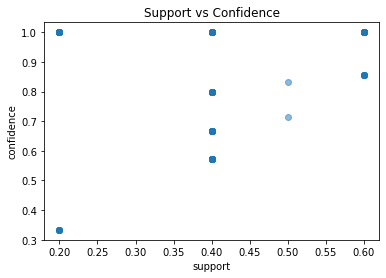

In [49]:
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [50]:
plt.scatter(rules2['support'], rules2['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

In [25]:
#Rules when min_support = 0.2 and min_threshold for confidence is 0.7

In [26]:
rules3 = association_rules(frequent_itemsets1, metric='confidence', min_threshold=0.7)
rules3

antecedents  \
0                  (Sixth Sense)   
1                    (Gladiator)   
2                   (Green Mile)   
3               (V1_Sixth Sense)   
4               (V3_Sixth Sense)   
..                           ...   
418  (Sixth Sense, V1_Gladiator)   
419     (Sixth Sense, Gladiator)   
420       (Sixth Sense, Patriot)   
421    (Sixth Sense, V2_Patriot)   
422             (V3_Sixth Sense)   

                                           consequents  antecedent support  \
0                                          (Gladiator)                 0.6   
1                                        (Sixth Sense)                 0.7   
2                                        (Sixth Sense)                 0.2   
3                                        (Sixth Sense)                 0.2   
4                                        (Sixth Sense)                 0.4   
..                                                 ...                 ...   
418   (V3_Sixth Sense, Gladiator, V2_Patriot, Patriot)                 0.4   
419  (V3_Sixth Sense, V1_Gladiator, V2_Patriot, Pat...                 0.5   
420  (V3_Sixth Sense, V1_Gladiator, V2_Patriot, Gla...                 0.4   
421  (Patriot, V3_Sixth Sense, V1_Gladiator, Gladia...                 0.4   
422  (V1_Gladiator, Gladiator, Patriot, Sixth Sense...                 0.4   

     consequent support  support  confidence      lift  leverage  conviction  
0                   0.7      0.5    0.833333  1.190476      0.08         1.8  
1                   0.6      0.5    0.714286  1.190476      0.08         1.4  
2                   0.6      0.2    1.000000  1.666667      0.08         inf  
3                   0.6      0.2    1.000000  1.666667      0.08         inf  
4                   0.6      0.4    1.000000  1.666667      0.16         inf  
..                  ...      ...         ...       ...       ...         ...  
418                 0.4      0.4    1.000000  2.500000      0.24         inf  
419                 0.4      0.4    0.800000  2.000000      0.20         3.0  
420                 0.4      0.4    1.000000  2.500000      0.24         inf  
421                 0.4      0.4    1.000000  2.500000      0.24         inf  
422                 0.4      0.4    1.000000  2.500000      0.24         inf  

[423 rows x 9 columns]

In [27]:
rules3= rules3.sort_values(['confidence', 'lift'], ascending =[False, False])
rules3

antecedents                          consequents  \
13                    (LOTR1)                              (LOTR2)   
14                    (LOTR2)                              (LOTR1)   
20           (V1_Sixth Sense)                         (Green Mile)   
21               (Green Mile)                     (V1_Sixth Sense)   
22            (V4_Green Mile)                         (Green Mile)   
..                        ...                                  ...   
125  (Sixth Sense, Gladiator)              (V1_Gladiator, Patriot)   
130  (Sixth Sense, Gladiator)                (V2_Patriot, Patriot)   
147  (Sixth Sense, Gladiator)           (V1_Gladiator, V2_Patriot)   
271  (Sixth Sense, Gladiator)  (V1_Gladiator, V2_Patriot, Patriot)   
1                 (Gladiator)                        (Sixth Sense)   

     antecedent support  consequent support  support  confidence      lift  \
13                  0.2                 0.2      0.2    1.000000  5.000000   
14                  0.2                 0.2      0.2    1.000000  5.000000   
20                  0.2                 0.2      0.2    1.000000  5.000000   
21                  0.2                 0.2      0.2    1.000000  5.000000   
22                  0.2                 0.2      0.2    1.000000  5.000000   
..                  ...                 ...      ...         ...       ...   
125                 0.5                 0.6      0.4    0.800000  1.333333   
130                 0.5                 0.6      0.4    0.800000  1.333333   
147                 0.5                 0.6      0.4    0.800000  1.333333   
271                 0.5                 0.6      0.4    0.800000  1.333333   
1                   0.7                 0.6      0.5    0.714286  1.190476   

     leverage  conviction  
13       0.16         inf  
14       0.16         inf  
20       0.16         inf  
21       0.16         inf  
22       0.16         inf  
..        ...         ...  
125      0.10         2.0  
130      0.10         2.0  
147      0.10         2.0  
271      0.10         2.0  
1        0.08         1.4  

[423 rows x 9 columns]

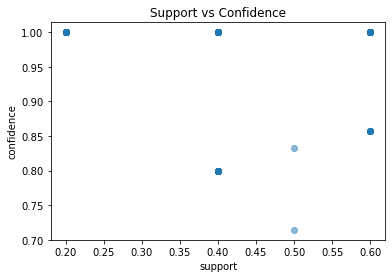

In [47]:
plt.scatter(rules3['support'], rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

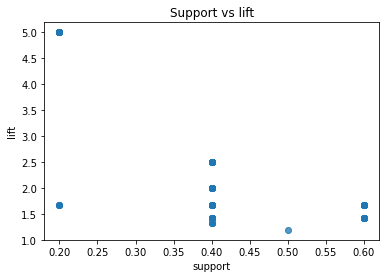

In [48]:
plt.scatter(rules3['support'], rules3['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

In [29]:
rules3[rules3.lift>1]

antecedents                          consequents  \
13                    (LOTR1)                              (LOTR2)   
14                    (LOTR2)                              (LOTR1)   
20           (V1_Sixth Sense)                         (Green Mile)   
21               (Green Mile)                     (V1_Sixth Sense)   
22            (V4_Green Mile)                         (Green Mile)   
..                        ...                                  ...   
125  (Sixth Sense, Gladiator)              (V1_Gladiator, Patriot)   
130  (Sixth Sense, Gladiator)                (V2_Patriot, Patriot)   
147  (Sixth Sense, Gladiator)           (V1_Gladiator, V2_Patriot)   
271  (Sixth Sense, Gladiator)  (V1_Gladiator, V2_Patriot, Patriot)   
1                 (Gladiator)                        (Sixth Sense)   

     antecedent support  consequent support  support  confidence      lift  \
13                  0.2                 0.2      0.2    1.000000  5.000000   
14                  0.2                 0.2      0.2    1.000000  5.000000   
20                  0.2                 0.2      0.2    1.000000  5.000000   
21                  0.2                 0.2      0.2    1.000000  5.000000   
22                  0.2                 0.2      0.2    1.000000  5.000000   
..                  ...                 ...      ...         ...       ...   
125                 0.5                 0.6      0.4    0.800000  1.333333   
130                 0.5                 0.6      0.4    0.800000  1.333333   
147                 0.5                 0.6      0.4    0.800000  1.333333   
271                 0.5                 0.6      0.4    0.800000  1.333333   
1                   0.7                 0.6      0.5    0.714286  1.190476   

     leverage  conviction  
13       0.16         inf  
14       0.16         inf  
20       0.16         inf  
21       0.16         inf  
22       0.16         inf  
..        ...         ...  
125      0.10         2.0  
130      0.10         2.0  
147      0.10         2.0  
271      0.10         2.0  
1        0.08         1.4  

[423 rows x 9 columns]

In [30]:
#Apriori algorithm for min_support = 0.25

In [31]:
frequent_itemsets2 = apriori(df, min_support=0.25, use_colnames=True)
frequent_itemsets2

C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.6                                          (Patriot)
3       0.6                                     (V1_Gladiator)
4       0.6                                       (V2_Patriot)
..      ...                                                ...
58      0.4  (V3_Sixth Sense, Gladiator, Patriot, Sixth Sen...
59      0.4  (V3_Sixth Sense, V1_Gladiator, Gladiator, Sixt...
60      0.4  (V3_Sixth Sense, V1_Gladiator, Patriot, Sixth ...
61      0.4  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...
62      0.4  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...

[63 rows x 2 columns]

In [32]:
frequent_itemsets2 = apriori(df, min_support = 0.25, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets  length
0       0.6                                      (Sixth Sense)       1
1       0.7                                        (Gladiator)       1
2       0.6                                          (Patriot)       1
3       0.6                                     (V1_Gladiator)       1
4       0.6                                       (V2_Patriot)       1
..      ...                                                ...     ...
58      0.4  (V3_Sixth Sense, Gladiator, Patriot, Sixth Sen...       5
59      0.4  (V3_Sixth Sense, V1_Gladiator, Gladiator, Sixt...       5
60      0.4  (V3_Sixth Sense, V1_Gladiator, Patriot, Sixth ...       5
61      0.4  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...       5
62      0.4  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...       6

[63 rows x 3 columns]

In [33]:
#Rules when min_support= 0.25 and min_threshold for lift is 0.7

In [34]:
rules4 = association_rules(frequent_itemsets2, metric='lift', min_threshold=0.7)
rules4

antecedents                                        consequents  \
0     (Sixth Sense)                                        (Gladiator)   
1       (Gladiator)                                      (Sixth Sense)   
2     (Sixth Sense)                                          (Patriot)   
3         (Patriot)                                      (Sixth Sense)   
4     (Sixth Sense)                                     (V1_Gladiator)   
..              ...                                                ...   
597  (V1_Gladiator)  (V3_Sixth Sense, Gladiator, Patriot, Sixth Sen...   
598     (Gladiator)  (V3_Sixth Sense, V1_Gladiator, Patriot, Sixth ...   
599       (Patriot)  (V3_Sixth Sense, V1_Gladiator, Gladiator, Sixt...   
600   (Sixth Sense)  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...   
601    (V2_Patriot)  (V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.6                 0.6      0.4    0.666667  1.111111   
..                  ...                 ...      ...         ...       ...   
597                 0.6                 0.4      0.4    0.666667  1.666667   
598                 0.7                 0.4      0.4    0.571429  1.428571   
599                 0.6                 0.4      0.4    0.666667  1.666667   
600                 0.6                 0.4      0.4    0.666667  1.666667   
601                 0.6                 0.4      0.4    0.666667  1.666667   

     leverage  conviction  
0        0.08         1.8  
1        0.08         1.4  
2        0.04         1.2  
3        0.04         1.2  
4        0.04         1.2  
..        ...         ...  
597      0.16         1.8  
598      0.12         1.4  
599      0.16         1.8  
600      0.16         1.8  
601      0.16         1.8  

[602 rows x 9 columns]

In [35]:
rules4.sort_values('lift',ascending = False)

antecedents  \
285             (V3_Sixth Sense, V2_Patriot)   
502                   (Sixth Sense, Patriot)   
425     (V3_Sixth Sense, Gladiator, Patriot)   
427  (V3_Sixth Sense, Gladiator, V2_Patriot)   
251     (Sixth Sense, V1_Gladiator, Patriot)   
..                                       ...   
37                 (Gladiator, V1_Gladiator)   
57                             (Sixth Sense)   
56                   (V1_Gladiator, Patriot)   
40                             (Sixth Sense)   
174                            (Sixth Sense)   

                                    consequents  antecedent support  \
285                 (Sixth Sense, V1_Gladiator)                 0.4   
502  (V3_Sixth Sense, V1_Gladiator, V2_Patriot)                 0.4   
425                   (Sixth Sense, V2_Patriot)                 0.4   
427                      (Sixth Sense, Patriot)                 0.4   
251                            (V3_Sixth Sense)                 0.4   
..                                          ...                 ...   
37                                (Sixth Sense)                 0.6   
57                      (V1_Gladiator, Patriot)                 0.6   
56                                (Sixth Sense)                 0.6   
40                    (Gladiator, V1_Gladiator)                 0.6   
174            (Gladiator, V2_Patriot, Patriot)                 0.6   

     consequent support  support  confidence      lift  leverage  conviction  
285                 0.4      0.4    1.000000  2.500000      0.24         inf  
502                 0.4      0.4    1.000000  2.500000      0.24         inf  
425                 0.4      0.4    1.000000  2.500000      0.24         inf  
427                 0.4      0.4    1.000000  2.500000      0.24         inf  
251                 0.4      0.4    1.000000  2.500000      0.24         inf  
..                  ...      ...         ...       ...       ...         ...  
37                  0.6      0.4    0.666667  1.111111      0.04         1.2  
57                  0.6      0.4    0.666667  1.111111      0.04         1.2  
56                  0.6      0.4    0.666667  1.111111      0.04         1.2  
40                  0.6      0.4    0.666667  1.111111      0.04         1.2  
174                 0.6      0.4    0.666667  1.111111      0.04         1.2  

[602 rows x 9 columns]

In [36]:
#Rules when min_support = 0.25 and min_threshold for confidence is 0.7

In [37]:
rules5 = association_rules(frequent_itemsets2, metric='confidence', min_threshold=0.7)
rules5

antecedents  \
0                  (Sixth Sense)   
1                    (Gladiator)   
2               (V3_Sixth Sense)   
3                    (Gladiator)   
4                      (Patriot)   
..                           ...   
373  (Sixth Sense, V1_Gladiator)   
374     (Sixth Sense, Gladiator)   
375       (Sixth Sense, Patriot)   
376    (Sixth Sense, V2_Patriot)   
377             (V3_Sixth Sense)   

                                           consequents  antecedent support  \
0                                          (Gladiator)                 0.6   
1                                        (Sixth Sense)                 0.7   
2                                        (Sixth Sense)                 0.4   
3                                            (Patriot)                 0.7   
4                                          (Gladiator)                 0.6   
..                                                 ...                 ...   
373   (V3_Sixth Sense, Gladiator, V2_Patriot, Patriot)                 0.4   
374  (V3_Sixth Sense, V1_Gladiator, V2_Patriot, Pat...                 0.5   
375  (V3_Sixth Sense, V1_Gladiator, V2_Patriot, Gla...                 0.4   
376  (Patriot, V3_Sixth Sense, V1_Gladiator, Gladia...                 0.4   
377  (V1_Gladiator, Gladiator, Patriot, Sixth Sense...                 0.4   

     consequent support  support  confidence      lift  leverage  conviction  
0                   0.7      0.5    0.833333  1.190476      0.08         1.8  
1                   0.6      0.5    0.714286  1.190476      0.08         1.4  
2                   0.6      0.4    1.000000  1.666667      0.16         inf  
3                   0.6      0.6    0.857143  1.428571      0.18         2.8  
4                   0.7      0.6    1.000000  1.428571      0.18         inf  
..                  ...      ...         ...       ...       ...         ...  
373                 0.4      0.4    1.000000  2.500000      0.24         inf  
374                 0.4      0.4    0.800000  2.000000      0.20         3.0  
375                 0.4      0.4    1.000000  2.500000      0.24         inf  
376                 0.4      0.4    1.000000  2.500000      0.24         inf  
377                 0.4      0.4    1.000000  2.500000      0.24         inf  

[378 rows x 9 columns]

In [38]:
rules5 = rules5.sort_values(['confidence', 'lift'], ascending =[False, False])
rules5

antecedents                          consequents  \
34        (Sixth Sense, Patriot)                     (V3_Sixth Sense)   
36              (V3_Sixth Sense)               (Sixth Sense, Patriot)   
39   (Sixth Sense, V1_Gladiator)                     (V3_Sixth Sense)   
42              (V3_Sixth Sense)          (Sixth Sense, V1_Gladiator)   
44     (Sixth Sense, V2_Patriot)                     (V3_Sixth Sense)   
..                           ...                                  ...   
93      (Sixth Sense, Gladiator)              (V1_Gladiator, Patriot)   
98      (Sixth Sense, Gladiator)                (V2_Patriot, Patriot)   
115     (Sixth Sense, Gladiator)           (V1_Gladiator, V2_Patriot)   
226     (Sixth Sense, Gladiator)  (V1_Gladiator, V2_Patriot, Patriot)   
1                    (Gladiator)                        (Sixth Sense)   

     antecedent support  consequent support  support  confidence      lift  \
34                  0.4                 0.4      0.4    1.000000  2.500000   
36                  0.4                 0.4      0.4    1.000000  2.500000   
39                  0.4                 0.4      0.4    1.000000  2.500000   
42                  0.4                 0.4      0.4    1.000000  2.500000   
44                  0.4                 0.4      0.4    1.000000  2.500000   
..                  ...                 ...      ...         ...       ...   
93                  0.5                 0.6      0.4    0.800000  1.333333   
98                  0.5                 0.6      0.4    0.800000  1.333333   
115                 0.5                 0.6      0.4    0.800000  1.333333   
226                 0.5                 0.6      0.4    0.800000  1.333333   
1                   0.7                 0.6      0.5    0.714286  1.190476   

     leverage  conviction  
34       0.24         inf  
36       0.24         inf  
39       0.24         inf  
42       0.24         inf  
44       0.24         inf  
..        ...         ...  
93       0.10         2.0  
98       0.10         2.0  
115      0.10         2.0  
226      0.10         2.0  
1        0.08         1.4  

[378 rows x 9 columns]

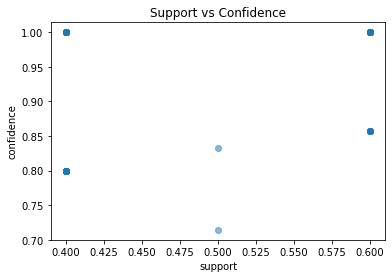

In [51]:
plt.scatter(rules5['support'], rules5['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

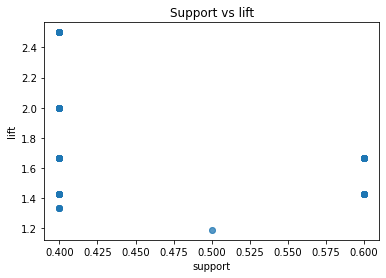

In [52]:
plt.scatter(rules5['support'], rules5['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()